# Precisions from RFFNet+models

In [42]:
import glob as glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.offsetbox import AnchoredText

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
CMAP = plt.cm.plasma
CMAP_R = plt.cm.plasma_r
COLORS = [CMAP(i / 4.0) for i in range(5)]

In [45]:
COLOR_0 = COLORS[0]
COLOR_1 = COLORS[1]
COLOR_2 = COLORS[2]
COLOR_3 = COLORS[3]

In [46]:
TEXTWIDTH = 3.25063
FONTSIZE = 6

In [47]:
def setup():
    matplotlib.rcParams.update({"font.size": FONTSIZE})  # controls default text sizes
    matplotlib.rcParams.update({"axes.titlesize": FONTSIZE})  # fontsize of the axes title
    matplotlib.rcParams.update({"axes.labelsize": FONTSIZE})  # fontsize of the x and y labels
    matplotlib.rcParams.update({"axes.formatter.use_mathtext": True})  # use scientific notation for axes with pretty formatting
    matplotlib.rcParams.update({"axes.formatter.useoffset": True}) #
    matplotlib.rcParams.update({"axes.formatter.limits": [0, 0]})  
    matplotlib.rcParams.update({"xtick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"ytick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"legend.fontsize": FONTSIZE})  # legend fontsize
    matplotlib.rcParams.update({"figure.titlesize": FONTSIZE})  # fontsize of the figure title

In [48]:
setup()

In [49]:
def load_precisions(filenames):
    filenames = sorted(filenames)
    scaler = MinMaxScaler()
    precisions = []
    unscaled_prec = [np.loadtxt(file) for file in filenames]
    for i in range(len(unscaled_prec)):
        prec = np.abs(unscaled_prec[i])
        prec = scaler.fit_transform(prec.reshape(-1,1)).ravel()
        precisions.append(prec)
    return precisions
    

# SE1

In [50]:
x = np.arange(1, 19)
x_labels = [i if i in (1,3,7,8,9) else "" for i in range(1, 19)]

In [51]:
rffp_precisions_se1 = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/se1/precisions/precisions.txt"))

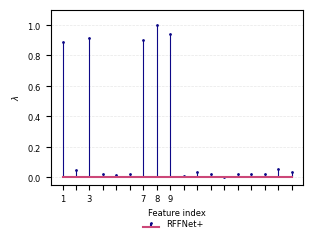

In [52]:
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rffp_precisions_se1[0], label="RFFNet+")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.8, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_xlabel("Feature index")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), ncols=3, loc=9, frameon=False )

plt.xticks(x, x_labels)
plt.ylim(-0.05, 1.1)
plt.savefig("../se1/rffnetp_precisions.pdf", bbox_inches="tight")
plt.show()

# SE2

In [53]:
x = np.arange(1, 101)
x_labels = [1, 20, 40, 60, 80, 100]

In [54]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/se2/precisions/precisions.txt"))

In [55]:
x_prime = [1, 11, 12, 13, 14, 15, 20, 40, 60, 80, 100]
x_labels = [1, 20, 40, 60, 80, 100]

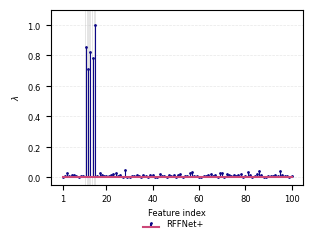

In [57]:
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet+")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.8, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_xlabel("Feature index")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), ncols=3, loc=9, frameon=False )

ax1.bar([11, 12, 13, 14, 15], 1.1, color="k", alpha=0.1, width=0.7)
ax1.bar([11, 12, 13, 14, 15], -0.05, color="k", alpha=0.1, width=0.7)

plt.xticks(x_labels, x_labels)
plt.ylim(-0.05, 1.1)
plt.savefig("../se2/rffnetp_precisions.pdf", bbox_inches="tight")
plt.show()

## SE1 + SE2

In [58]:
x_1 = np.arange(1, 19)
x_labels_1 = [i if i in (1,3,7,8,9) else "" for i in range(1, 19)]

In [59]:
rffp_precisions_1 = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/se1/precisions/precisions.txt"))

In [60]:
x_2 = np.arange(1, 101)
x_labels_2 = [1, 20, 40, 60, 80, 100]

In [61]:
rffp_precisions_2 = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/se2/precisions/precisions.txt"))

In [62]:
x_prime_2 = [1, 11, 12, 13, 14, 15, 20, 40, 60, 80, 100]
x_labels_2 = [1, 20, 40, 60, 80, 100]

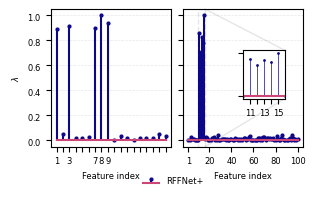

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True,
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.55))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
conf = ax1.stem(x_1, rffp_precisions_1[0], label="RFFNet+")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()
ax1.set_xlabel("Feature index")
ax1.set_xticks(x_1, x_labels_1)

fig.subplots_adjust(hspace=0.3, wspace=0.1)
conf = ax2.stem(x_2, rffp_precisions_2[0])
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()
ax2.set_xlabel("Feature index")
ax2.set_xticks(x_labels_2, x_labels_2)

# conf = ax2.stem(x, xgb_precisions[0], label="XGB")
# ax2.set_ylabel(r"$\lambda$")
# plt.setp(conf[0], ms=2, color=COLOR_1)
# plt.setp(conf[1], color=COLOR_1)
# plt.setp(conf[2], color='w')
# ax2.set_ylim(1e-4, 3.0)
# ax2.set_yscale("log")



axins = ax2.inset_axes([0.5, 0.35, 0.35, 0.35])
conf = axins.stem(x_2, rffp_precisions_2[0])
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

axins.set_xlim(10, 16)
axins.set_xticks(range(11, 16), [11, None, 13, None, 15])
#axins.set_xticklabels([])
axins.set_yticklabels([])
ax2.indicate_inset_zoom(axins, edgecolor="black", alpha=0.1, linestyle='dashed')
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), loc=9, ncols=4, frameon=False )


plt.savefig("../../figures/se1/se1se2_rffnetp_precisions.pdf", bbox_inches="tight")
plt.show()

# Cpusmall

In [65]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/cpusmall/precisions/precisions.txt"))

In [66]:
x = np.arange(1, 13)
x_labels = [1,3,5,7,9,11]

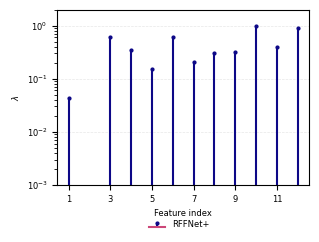

In [68]:
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet+")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_yscale("log")
ax1.set_xlabel("Feature index")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), loc=9, ncols=3, frameon=False )

plt.xticks(x_labels, x_labels)
plt.ylim(1e-3, 2)
plt.savefig("../../figures/compact/rffnetp_precisions.pdf", bbox_inches="tight")
plt.show()

# Ailerons

In [69]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/ailerons/precisions/precisions.txt"))

In [70]:
len(rff_precisions[0])

40

In [71]:
x = np.arange(1, 41)
x_labels = [1,10,20,30,40]

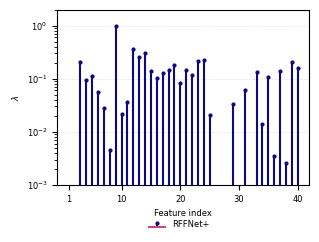

In [72]:
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet+")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_yscale("log")
ax1.set_xlabel("Feature index")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), loc=9, ncols=3, frameon=False )

plt.xticks(x_labels, x_labels)
plt.ylim(1e-3, 2)
plt.savefig("../../figures/ailerons/rffnetp_precisions.pdf", bbox_inches="tight")
plt.show()

# Amazon

In [73]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/amazon/precisions/precisions.txt"))[0]

In [74]:
x = np.arange(1, rff_precisions.shape[0] +1)
x_labels = []

In [75]:
features = np.load("../../data/splitted/amazon/features.npy", allow_pickle=True)

In [76]:
n_words = 10

In [77]:
lower = np.argsort(rff_precisions)[:n_words]
higher = np.argsort(rff_precisions)[-n_words:]

In [78]:
features[lower]

array(['sight', 'v8', 'atkin', 'perman', 'decis', 'extens', 'tetley',
       'soul', 'herring', 'nippl'], dtype=object)

In [79]:
x_rff = np.append(features[lower], features[higher])
y_rff = np.append(rff_precisions[lower], rff_precisions[higher])

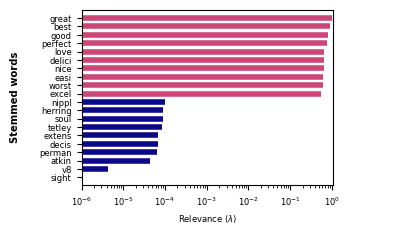

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
ax.hlines(np.array(range(len(features[higher]))) + n_words, 0, rff_precisions[higher], color=COLOR_2, linewidth=4)
ax.hlines(np.array(range(len(features[lower]))) , 0, rff_precisions[lower], color=COLOR_0, linewidth=4)
# ax.hlines(np.array(range(len(features[higher]))), 0, rff_precisions[higher], color=COLOR_0, linewidth=4, label="RFFNet")
#ax.hlines(np.array(range(len(x_xgb)))-0.25, 0, y_xgb, color=COLOR_3, linewidth=4, label="XGB")
ax.set_xscale("log")
ax.set_yticks(np.array(range(len(x_rff))), x_rff)
#ax.set_yticks(np.array(range(len(features[higher]))), features[higher])
ax.set_xlabel("Relevance ($\lambda$)")
ax.set_xlim(1e-6, 1.1)
fig.supylabel("Stemmed words", x=-9.5e-2, fontweight="bold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(1.07, 0.9), frameon=False )
plt.savefig("../amazon/rffnetp_relevances.pdf", bbox_inches="tight")
plt.show()

# Higgs

In [89]:
rffnetp_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnetp/higgs/precisions/precisions.txt"))
xgb_precisions = load_precisions(glob.glob("../../eval/benchmarks/xgb/higgs/precisions/precisions.txt"))

In [90]:
rff_precisions[0].shape

()

In [91]:
x = np.arange(1, 29)
x_labels = [1,5,10,15,20,25]

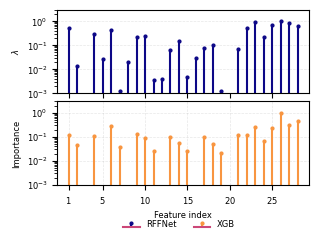

In [92]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True,
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
conf = ax1.stem(x, rffnetp_precisions[0], label=r"RFFNet")
ax1.set_ylabel(r"$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.set_yscale("log")
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

conf = ax2.stem(x, xgb_precisions[0], label="XGB")
ax2.set_ylabel("Importance")
plt.setp(conf[0], ms=2, color=COLOR_3)
plt.setp(conf[1], color=COLOR_3)
plt.setp(conf[2], color=COLOR_2)
ax2.set_xlabel(r"Feature index")
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=9, bbox_to_anchor=(0.5, -0.01), ncols=2, frameon=False)


plt.xticks(x_labels, ["$%d$"%i for i in x_labels])
plt.ylim(1e-3, 3)
plt.savefig("../higgs/rffnetp_relevances.pdf", bbox_inches="tight")
plt.show()